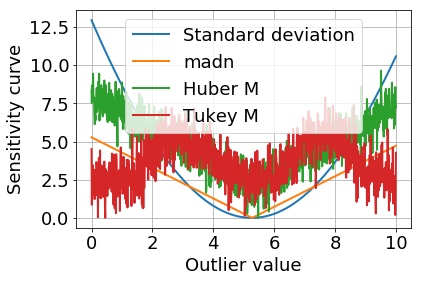

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

from robustsp.LocationScale.MscaleTUK import *
from robustsp.LocationScale.MscaleHUB import *
from robustsp.AuxiliaryFunctions.madn import madn

# fix seed of random number generator for reproducibility
random.seed(0)

# Number of measurements
N = 100

# DC voltage in AWGN
x_N_minus1 = np.random.randn(N-1)+5

# outlier values
delta_x = np.linspace(0,10,1000)

# sensitivity curve for standard deviation
SC_std = np.zeros(delta_x.shape)
std_hat = np.std(x_N_minus1, ddof=1) # 1.0551

for ii in range(len(delta_x)):
    SC_std[ii] = N*(np.std(np.append(x_N_minus1,delta_x[ii]), ddof=1) 
                     - std_hat)
    
# sensitivity curve for median absolute deviation
# that does not coverge to IF
SC_mad = np.zeros(delta_x.shape)
std_hat = madn(x_N_minus1) # 0.8319

for ii in range(len(delta_x)):
    SC_mad[ii] = N*(madn(np.append(x_N_minus1,delta_x[ii])) 
                     - std_hat) 
    
# Sensitivity Curve for mean absolute deviation
# around the median
SC_mead = np.zeros(delta_x.shape)
std_hat = np.mean(np.abs(x_N_minus1-np.median(x_N_minus1))) # 0.7859

for ii in range(len(delta_x)):
    SC_mead[ii] = N*(np.mean(np.abs(np.append(x_N_minus1, delta_x[ii])
                                         -np.median(x_N_minus1)))
                     -std_hat)
    
# Sensitivity Curve for Huber's scale estimate
c =  1.3415 
SC_hub = np.zeros(len(delta_x))
std_hat = MscaleHUB(x_N_minus1,c)
for ii in range(len(delta_x)):
    SC_hub[ii] = N*(MscaleHUB(np.append(x_N_minus1, delta_x[ii]),c)
                    -std_hat)
    
# Sensitivity Curve for Tukey's scale estimate
c = 4.68 
SC_tuk = np.zeros(delta_x.shape)
std_hat = MscaleTUK(x_N_minus1,c) # Soll: 0.8772

for ii in range(len(delta_x)):
    SC_tuk[ii] = N*(MscaleTUK(np.append(x_N_minus1, delta_x[ii]),c)-std_hat)
    
plt.rcParams.update({'font.size': 18})

plt.plot(delta_x,SC_std-np.amin(SC_std), label ='Standard deviation', linewidth=2)
plt.plot(delta_x,SC_mead-np.amin(SC_mead), label='madn', linewidth=2)
plt.plot(delta_x,SC_hub-np.amin(SC_hub), label='Huber M', linewidth=2)
plt.plot(delta_x,SC_tuk-np.amin(SC_tuk), label ='Tukey M', linewidth=2)

plt.grid(True)

plt.xlabel('Outlier value')
plt.ylabel('Sensitivity curve')
plt.legend()

plt.show()

In [13]:
import scipy.io as sio

SC_m = sio.loadmat('SC')

sc_hub_m = SC_m['SC_hub'].flatten()
np.isclose(SC_hub,sc_hub_m,1e-1)

array([False,  True,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,